In [1]:
import numpy as np
import jax.numpy as jnp

from ipywidgets import HBox, VBox, Output
from utils import Plotter, Dataset, make_dataset

In [2]:
def format_buttons(plotter):
    display(VBox(plotter.register_title_cards()))

    display(HBox(plotter.register_batch_size_buttons()))
    print('Parameters')
    display(HBox([
        VBox(list(plotter.register_parameters())),
        VBox([plotter.register_parameter_freezer()])
    ]))


def choice(v):
    assert v > 0
    assert v <= 2

    param_range = np.arange(-v, v+0.25, 0.25)
    return np.random.choice(param_range)

def l2_loss(params, forward, x, y):
    err = forward(params, x) - y
    return jnp.mean(jnp.square(err))

# $y \approx \color{#4385BE}{w} \cdot \color{#DA702C}{x} $

In [3]:
gtparams = {
    'w': choice(2)
}

def linear_model(params, x):
    return x * params['w'] + params.get('b', 0)

dataset = make_dataset(gtparams, linear_model)
params = {k: 0.0 for k, v in gtparams.items()}

plotter = Plotter(params, linear_model, l2_loss, dataset, Output())

format_buttons(plotter)
plotter.display()
plotter.output

Parameters


Output()

# $y \approx \color{#4385BE}{w} \cdot x + \color{#4385BE}{b}$

In [10]:
gtparams = {
    'w': choice(2), 'b': choice(2)
}

dataset = make_dataset(gtparams, linear_model, eps=1.5)
params = {k: 0.0 for k, v in gtparams.items()}

plotter = Plotter(params, linear_model, l2_loss, dataset, Output())

format_buttons(plotter)
plotter.display()
plotter.output

Parameters


Output()


$$ 
\begin{align}
\ell^2_2(w; \textbf{y}, \textbf{x}) & = ||\textbf{y}- w\cdot \textbf{x}||^2 \\
& = (\textbf{y} - w  \cdot \textbf{x})^T (\textbf{y} - w \cdot \textbf{x}) \\
& = w ^2 \textbf{x}^T\textbf{x} - 2w  \textbf{x}^T\textbf{y} + \textbf{y}^T\textbf{y} \\
& = a\color{#4385BE}{w} ^2 + 2b\color{#4385BE}{w} + c
\end{align}
$$

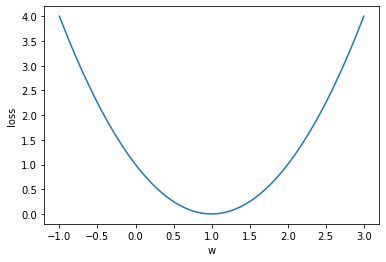

In [6]:
import matplotlib.pyplot as plt
tw = 1; lx, ux = tw - 2, tw + 2
xx = np.linspace(lx, ux, 100)

plt.plot(xx, (xx - tw)**2)
plt.xlabel('w'); plt.ylabel('loss')
plt.show()

# $y \approx \color{#4385BE}{w_3} \cdot \color{#DA702C}{x^3} + \color{#4385BE}{w_2} \cdot \color{#DA702C}{x^2} + \color{#4385BE}{w_1} \cdot \color{#DA702C}{x} + \color{#4385BE}{w_0}$

In [12]:
gtparams = {
    'w0': choice(2),
    'w1': choice(2),
    'w2': choice(2),
    'w3': choice(2)
}

def polynomial_model(params, x):
    return \
        1 / 3 * params['w3'] * x**3 \
        + 1/ 2 * params['w2'] * x**2 \
        + params['w1'] * x \
        + params.get('w0', 0)

dataset = make_dataset(gtparams, polynomial_model, n=1000, eps=1)
params = {k: 0.0 for k, v in gtparams.items()}

plotter = Plotter(params, polynomial_model, l2_loss, dataset, Output())

format_buttons(plotter)
plotter.display()
plotter.output

Parameters


Output()

# Learning feature representations with deep learning

$$
\begin{align}
y &= f(x; w, \theta) \\
  &= \color{#4385BE}{w_1} \cdot \color{#DA702C}{z_1(}x; \color{#4385BE}{\theta}\color{#DA702C}{)} + \color{#4385BE}{w_2} \cdot \color{#DA702C}{z_2(}x; \color{#4385BE}{\theta} \color{#DA702C}{)} + \ldots
\end{align}
$$